In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## All estimators combined

In [2]:
df_all = pd.read_csv("./tables/compare_probs_hyper_all.csv")
df_avg = pd.read_csv("./tables/compare_probs_hyper_all_avg.csv")
df_ind = pd.read_csv("./tables/compare_probs_hyper_all_ind.csv")

In [13]:
df_all

,selection,prob,err,color
0,oracle,0.673487,0.015603,0.400000
1,worst,0.493372,0.016635,0.760784
2,default,0.563977,0.016500,0.647059


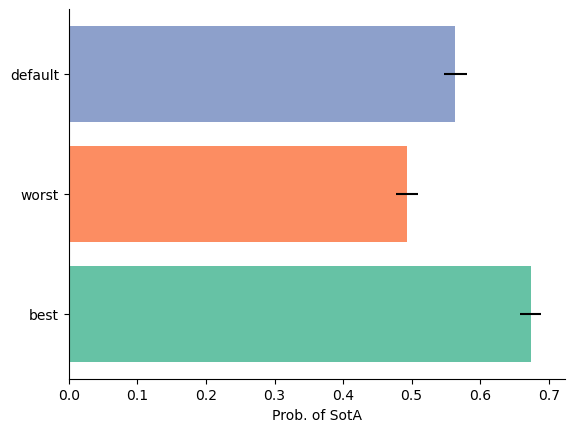

In [16]:
plt.barh(['best', 'worst', 'default'], df_all['prob'], xerr=df_all['err'], color=[colors[0], colors[1], colors[2]])
plt.xlabel('Prob. of SotA')
plt.savefig('prob_hyper_all.pdf', dpi=1000, bbox_inches="tight")

In [17]:
df_merge = df_avg.merge(df_ind, on='selection', suffixes=['_avg', '_ind'])

In [20]:
df_merge.values

array([['oracle', 0.8087248322147651, 0.01997066939532,
        0.5717171717171717, 0.0217961318062236],
       ['worst', 0.5731543624161074, 0.0251150566388503,
        0.4333333333333333, 0.0218272166104778],
       ['default', 0.6523489932885906, 0.0241810236091503,
        0.4974747474747474, 0.0220235812840607]], dtype=object)

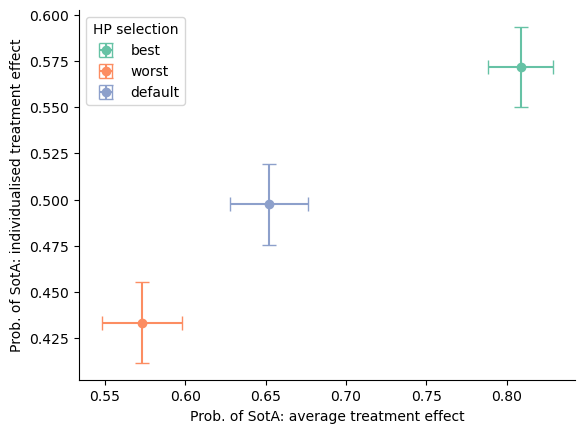

In [23]:
labels = ['best', 'worst', 'default']
colors_3 = [colors[0], colors[1], colors[2]]
for row, l, c in zip(df_merge.values, labels, colors_3):
    plt.errorbar(row[1], row[3], xerr=row[2], yerr=row[4], fmt='o', capsize=5, label=l, ecolor=c, mfc=c, mec=c)

plt.legend(title='HP selection')
plt.xlabel('Prob. of SotA: average treatment effect')
plt.ylabel('Prob. of SotA: individualised treatment effect')

plt.savefig('prob_hyper_2d.pdf', dpi=1000, bbox_inches="tight")

## Causal estimators

In [3]:
df_all = pd.read_csv("./tables/compare_probs_hyper_est.csv")

In [4]:
df_all.loc[df_all['model'] == 'sl', 'model'] = 'SL'
df_all.loc[df_all['model'] == 'tl', 'model'] = 'TL'
df_all.loc[df_all['model'] == 'ipsws', 'model'] = 'IPSW'
df_all.loc[df_all['model'] == 'drs', 'model'] = 'DR'
df_all.loc[df_all['model'] == 'dmls', 'model'] = 'DML'
df_all.loc[df_all['model'] == 'xl', 'model'] = 'XL'
df_all.loc[df_all['model'] == 'cf', 'model'] = 'CF'

In [5]:
df_all

,selection,model,prob,err
0,oracle,SL,0.653968,0.037147
1,oracle,TL,0.677778,0.036493
2,oracle,IPSW,0.719565,0.041051
3,oracle,DR,0.628571,0.040020
4,oracle,DML,0.666071,0.039062
5,oracle,XL,0.701786,0.037890
6,oracle,CF,0.700000,0.107354
7,worst,SL,0.463492,0.038940
8,worst,TL,0.500000,0.039044
9,worst,IPSW,0.545652,0.045502


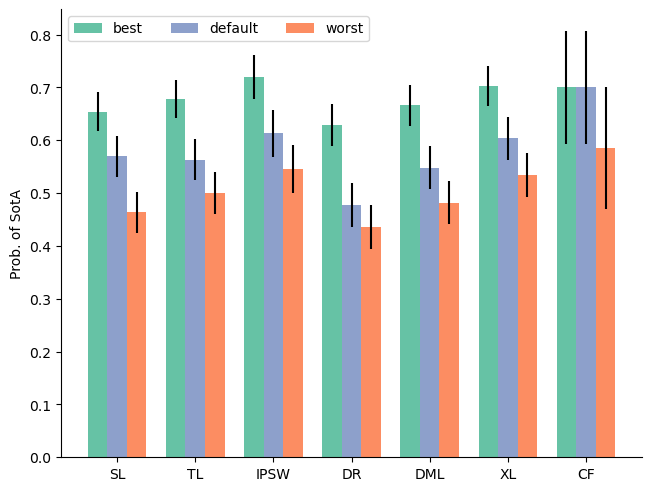

In [32]:
fig, ax = plt.subplots(layout='constrained')

width = 0.25
multiplier = 0
models = df_all['model'].unique()
x = np.arange(len(models))

selection = ['oracle', 'default', 'worst']
labels = ['best', 'default', 'worst']
colors_3 = [colors[0], colors[2], colors[1]]

for s, l, c in zip(selection, labels, colors_3):
    df_local = df_all.loc[df_all['selection'] == s]
    offset = width * multiplier
    rects = ax.bar(x + offset, df_local['prob'], width, label=l, yerr=df_local['err'], color=c)
    multiplier += 1

ax.set_ylabel('Prob. of SotA')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=3)

plt.savefig('prob_hyper_est.pdf', dpi=1000, bbox_inches="tight")

In [6]:
df_all = pd.read_csv("./tables/compare_probs_hyper_bl.csv")

In [7]:
df_all.loc[df_all['model'] == 'l1', 'model'] = 'L1'
df_all.loc[df_all['model'] == 'l2', 'model'] = 'L2'
df_all.loc[df_all['model'] == 'dt', 'model'] = 'DT'
df_all.loc[df_all['model'] == 'rf', 'model'] = 'RF'
df_all.loc[df_all['model'] == 'et', 'model'] = 'ET'
df_all.loc[df_all['model'] == 'kr', 'model'] = 'KR'
df_all.loc[df_all['model'] == 'cb', 'model'] = 'CB'
df_all.loc[df_all['model'] == 'lgbm', 'model'] = 'LGBM'
df_all.loc[df_all['model'] == 'mlp', 'model'] = 'NN'

In [8]:
df_all

,selection,model,prob,err
0,oracle,L1,0.673810,0.044837
1,oracle,L2,0.579487,0.048993
2,oracle,DT,0.697619,0.043926
3,oracle,RF,0.704762,0.043625
4,oracle,ET,0.700000,0.044909
5,oracle,KR,0.583784,0.050227
6,oracle,CB,0.764286,0.040593
7,oracle,LGBM,0.688095,0.044306
8,oracle,NN,0.600000,0.081152
9,worst,L1,0.340476,0.045320


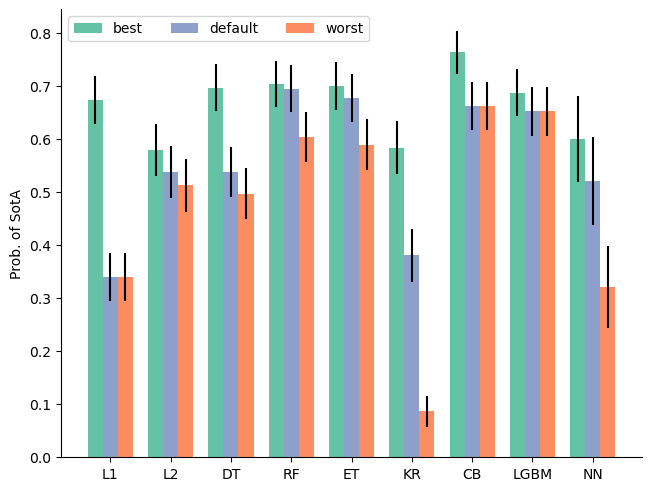

In [38]:
fig, ax = plt.subplots(layout='constrained')

width = 0.25
multiplier = 0
models = df_all['model'].unique()
x = np.arange(len(models))

selection = ['oracle', 'default', 'worst']
labels = ['best', 'default', 'worst']
colors_3 = [colors[0], colors[2], colors[1]]

for s, l, c in zip(selection, labels, colors_3):
    df_local = df_all.loc[df_all['selection'] == s]
    offset = width * multiplier
    rects = ax.bar(x + offset, df_local['prob'], width, label=l, yerr=df_local['err'], color=c)
    multiplier += 1

ax.set_ylabel('Prob. of SotA')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=3)

plt.savefig('prob_hyper_bl.pdf', dpi=1000, bbox_inches="tight")